Enter no of layers
4
[[1. 1. 0. 0.]]
The final cost = 0.009159420330024584


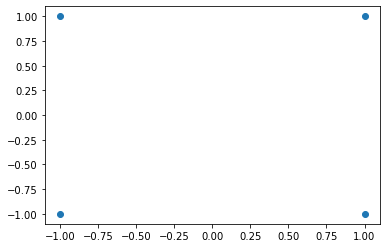

In [215]:
#single layer neural network
#solved xor problem using single layer neural network

import numpy as np
import matplotlib.pyplot as plt


#initialsie neural network
#nh no of hidden nodes dim
#ny output layer dims
#X=(m,nx)
#Y=(1,m)
#nx x dimesnions
#m no of traing examples(d)
class NeuralNetwork():
    def __init__(self,nx,ny,m,nh):
        self.W1=np.random.randn(nh,nx)
        self.b1=np.zeros(shape=(nh, 1))
        self.W2=np.random.randn(ny,nh)
        self.b2=np.zeros(shape=(ny, 1))
    #activation
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

#farword propagation
def forward_prop(W1,b1,W2,b2,node):
    cache={}
    Z1=np.dot(W1,X.T)+b1
    A1=node.sigmoid(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=node.sigmoid(Z2)
    cache={"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2}
    return cache

#back propagation
def back_pass(y,cache,node):
    m=y.shape[1]
    A2=cache["A2"]
    A1=cache["A1"]
    W2=node.W2
    dZ2=A2-y
    dW2=np.dot(dZ2,A1.T)/m
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*A1*(1-A1)
    dW1 = 1/m*np.dot(dZ1,X)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads
    
#cost of a function
def cost(Y,cache):
    A2=cache["A2"]
    m=y.shape[1]
    loss=np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    return -np.sum(loss)/m

#update weights
def update(node,grads,n):
    node.W1=node.W1-n*grads["dW1"]
    node.b1=node.b1-n*grads["db1"]
    node.W2=node.W2-n*grads["dW2"]
    node.b2=node.b2-n*grads["db2"]

#update model
def nn_model(node,y,no_of_iterations,learning_rate):
    
    for i in range(no_of_iterations):
        cache=forward_prop(node.W1,node.b1,node.W2,node.b2,node)
        loss=cost(y,cache)
        grads=back_pass(y,cache,node)
        update(node,grads,learning_rate)
        
    return cache

#predict
def predictions(node):
    cache=forward_prop(node.W1,node.b1,node.W2,node.b2,node)
    A2=cache["A2"]
    print(np.round(A2))
    
#data set
X=np.array([[1,-1],[-1,1],[1,1],[-1,-1]])
y=np.array([[1,1,0,0]])

#gettnf dims
nx=X.shape[1]
m=X.shape[0]
print("Enter no of layers")
nh=int(input())
ny=1

node=NeuralNetwork(nx,ny,m,nh)
cache=forward_prop(node.W1,node.b1,node.W2,node.b2,node)
grads=back_pass(y,cache,node)
cache=nn_model(node,y,10000,0.1)
predictions(node)
print("The final cost =",cost(y,cache))
plt.scatter(X[0:,:1],X[0:,1:])


In [178]:
    
X=np.array([[1,-1],[-1,1],[1,1],[-1,-1]])
print(X[0:,:1])

[[ 1]
 [-1]
 [ 1]
 [-1]]
